# Part of Speech


## Requirements

- Download the libraries covered in the book NLTK.
- Download specific libraries,

In [0]:
import tarfile
import nltk
nltk.download() #1. d, 2. book, 3. q

nltk.download('treebank')

!pip3 install python-crfsuite
!pip install dill

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> book
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package chat80 to /root/nltk_data...
       |   Package chat80 is already up-to-date!
       | Downloading package cmudict to /root/nltk_data...
       |   Package cmudict is already up-to-date!
       | Downloading package conll2000 to /root/nltk_data...
       |   Package conll2000 is already up-to-date!
       | Downloading package conll2002 to /root/nltk_data...
       |   Package conll2002 is already up-to-date!
       | Downloading packa

# Lab Session 3


# Exercise

Statement:

https://gebakx.github.io/ihlt/s4/index.html#8

1. Consider Treebank corpus.

  - Train HMM, TnT, perceptron and CRF models using the first 500, 1000, 1500, 2000, 2500 and 3000 sentences.

  - Evaluate the resulting 24 models using sentences from 3001.

2. Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).

  - Which model would you select? Justify the answer.
  
Upload the jupyter file of the exercise to the Raco.


**Steps:**

The idea is to train the previous models by using a variable set of sentences. Then, save the accuracy results to plot the learning curves and discuss. So, in order to achieve that the following steps are needed:

1. Wrap each model (HMM, TnT, perceptron and CRF)using a function to summarize the training and evaluating phase.

2. Declare a dictionary 'models' that contains the previous functions (to use them later in a loop) and a dictionary 'results' that stores the size of training set, the accuracy and the time (which is optional).

3. Iterave over 'models' and the training sets (500, 1000, etc.) to train each model. It calculates the 24 models. Then save the results in dictionary 'results'.

4. Plot the learning curves.


In [0]:
import matplotlib.pyplot as plt
import time

from nltk.corpus import treebank
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.tag.tnt import TnT
from nltk.tag.perceptron import PerceptronTagger
from nltk.tag import CRFTagger

n_sentences = [500, 1000, 1500, 2000, 2500, 3000]
# n_sentences = [10, 20, 30, 40, 50]

# 1. Wrap each model using a function to train and evaluate.

def run_hmm(train_data, test_data):
  hmm = HiddenMarkovModelTrainer()
  hmm = hmm.train_supervised(train_data)
  return hmm.evaluate(test_data)

def run_tnt(train_data, test_data):
  tnt = TnT()
  tnt.train(train_data)
  return tnt.evaluate(test_data)

def run_per(train_data, test_data):
  per = PerceptronTagger(load=False)
  per.train(train_data)
  return per.evaluate(test_data)

def run_crf(train_data, test_data):
  crf = CRFTagger()
  crf.train(train_data, "model.crf.tagger")
  return crf.evaluate(test_data)

# 2. Declare a dictionary of these functions and results.

models = {'HMM': run_hmm,
          'TnT': run_tnt,
          'PER': run_per,
          'CRF': run_crf}

results = {'HMM': {'x':[], 'y':[], 'time':[]},
           'TnT': {'x':[], 'y':[], 'time':[]},
           'PER': {'x':[], 'y':[], 'time':[]},
           'CRF': {'x':[], 'y':[], 'time':[]}}

total_data = treebank.tagged_sents()

# 3. Call the functions for the 24 models and save the results.
for name, model in models.items():
  
  for n_sents in n_sentences:
    train_data = total_data[:n_sents]
    test_data = total_data[3000:]
    start = time.time()
    acc = model(train_data, test_data)
    end = time.time()

    results[name]['x'].append(n_sents)
    results[name]['y'].append(acc)
    results[name]['time'].append(end - start)

    print(f'Name: {name} | Acc: {acc:.3f} | Size : {n_sents} | Time: {(end - start):.3f}s')


Name: HMM | Acc: 0.173 | Size : 500 | Time: 5.826s
Name: HMM | Acc: 0.221 | Size : 1000 | Time: 6.534s
Name: HMM | Acc: 0.262 | Size : 1500 | Time: 6.996s
Name: HMM | Acc: 0.304 | Size : 2000 | Time: 7.266s
Name: HMM | Acc: 0.335 | Size : 2500 | Time: 7.630s
Name: HMM | Acc: 0.368 | Size : 3000 | Time: 7.904s
Name: TnT | Acc: 0.747 | Size : 500 | Time: 14.177s
Name: TnT | Acc: 0.796 | Size : 1000 | Time: 37.386s
Name: TnT | Acc: 0.827 | Size : 1500 | Time: 58.714s
Name: TnT | Acc: 0.848 | Size : 2000 | Time: 74.414s
Name: TnT | Acc: 0.862 | Size : 2500 | Time: 79.897s
Name: TnT | Acc: 0.876 | Size : 3000 | Time: 83.030s
Name: PER | Acc: 0.914 | Size : 500 | Time: 4.582s
Name: PER | Acc: 0.934 | Size : 1000 | Time: 7.430s
Name: PER | Acc: 0.941 | Size : 1500 | Time: 10.374s
Name: PER | Acc: 0.949 | Size : 2000 | Time: 13.436s
Name: PER | Acc: 0.954 | Size : 2500 | Time: 16.249s
Name: PER | Acc: 0.958 | Size : 3000 | Time: 18.707s
Name: CRF | Acc: 0.910 | Size : 500 | Time: 4.987s
Name: 

## Interpretation

### **1. Plot: training set size vs accuracy**

PER(Perceptron) and CRF have similar accuracy from the beginning, it means, their convergence is fast. The model TnT also has a fast convergence (its accuracy increases fast in each training set) but its accuracy is no so good.





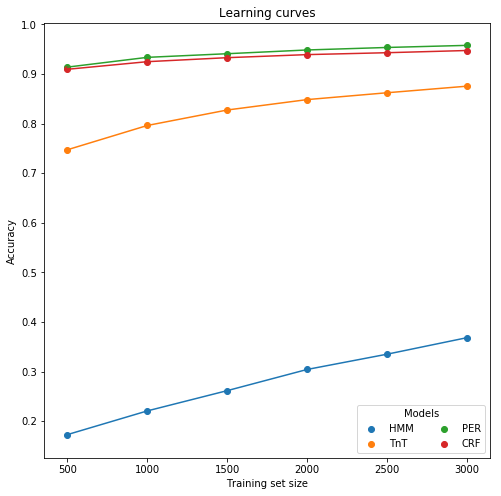

In [0]:
plt.rcParams['figure.figsize'] = 8, 8

for name, axis in results.items():
  plt.scatter(axis['x'], axis['y'], label=name)
  plt.plot(axis['x'], axis['y'])

plt.title('Learning curves')
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.legend(loc='best', frameon=True, ncol=2, title="Models")

plt.show()

### **2. Plot: training set size vs time**

The TnT model is the slowest. The time increases a lot as the training size increases, it is due to mainly the large markov chains that have to calculate. The second slowest is the CRF model, it is based on conditional random fields which also contains chains of probabilistic sequences but its implementation has robust and fast methods (BFGS, perceptron, etc.)

The fastest model is the HMM, it has a linear time but it has the worst accuracy. It is also based on Markov chains but because of the 'hidden', it is time invariante because it just depends on the current state.





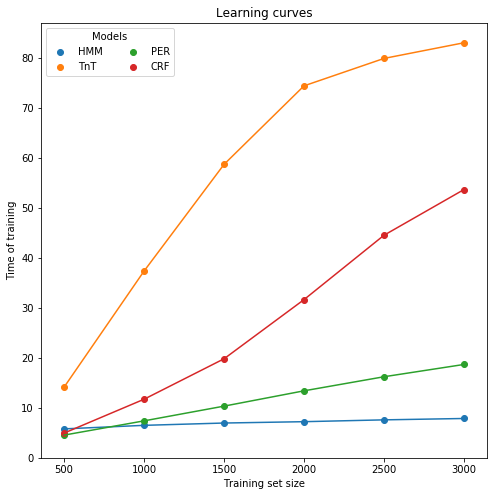

In [0]:
plt.rcParams['figure.figsize'] = 8, 8

for name, axis in results.items():
  plt.scatter(axis['x'], axis['time'], label=name)
  plt.plot(axis['x'], axis['time'])

plt.title('Learning curves')
plt.xlabel("Training set size")
plt.ylabel("Time of training")
plt.legend(loc='best', frameon=True, ncol=2, title="Models")

plt.show()

### **3. Plot: training set size vs accuracy vs time**

This graph combines the previous three features: the training set size, the accuracy and the training time in a same plot. Where the size of the dots are proportional to their training time. The larger size, the more expensive.


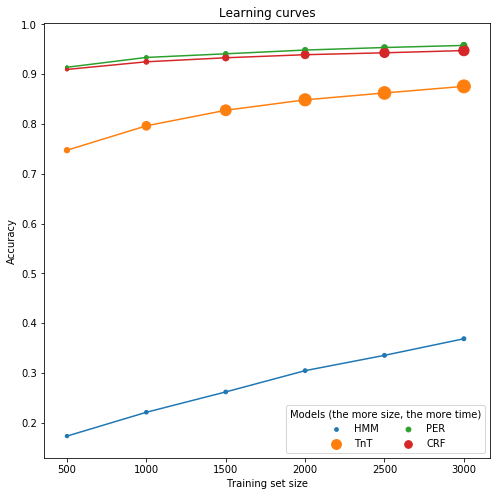

In [0]:
plt.rcParams['figure.figsize'] = 8, 8

for name, axis in results.items():
  plt.scatter(axis['x'], axis['y'], s=[t*2 for t in axis['time']], label=name)
  plt.plot(axis['x'], axis['y'])

plt.title('Learning curves')
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.legend(loc='best', frameon=True, ncol=2, title="Models (the more size, the more time)")

plt.show()

# Conclusions

1. PER(Perceptron) and CRF have similar accuracy from the beginning, so we can conclude that both model have a fast convergence.

2. I would choose the Perceptron model, because it has both nice accuracy and  good training time. 

3. The second chosen model would be the CRF algorithm, because it has a good accuracy but in some real time scenarios (like smart cities) it will have some delays. So depending on the use cases, someone has to choose the best option for  each scenario.

4. The HMM model could be chosen as a baseline because of its training time which is very fast.

5. To sum up, going deeper in the analysis, we have to choose the best model for each business model, i.e, for each application. Some applications could need a fast training and a fair accuracy, and others a high accuracy despite of training time. Even though, there are  applications that could need high precision in some predictions, for instance, more than 95% precision when predicting adjectives and verbs (looking deeper into a confusion matrix). 


## Optional: Confusion matrix

Additionally, a good metric to measure the performane of a model is the confusion matrix, because it takes into account the false positive and true positive, and more. So we can see not only the good predictions but also the errors when predicting.


In [0]:
%%time

# Confusion matrix

# train_data = total_data[:n_sents]
# test_data = total_data[3000:]


# Predicting
HMM = HiddenMarkovModelTrainer()
HMM = HMM.train_supervised(train_data)

test_tags = [tag for sent in test_data for (word, tag) in sent]
words_tags = [word for sent in test_data for (word, tag) in sent]
pred_tags = [t for (w, t) in HMM.tag(words_tags)]

print(f'Test tags:\n {test_tags[:10]}')
print(f'Predictions tags:\n {pred_tags[:10]}')


print(f' confusion matrix:\n {nltk.ConfusionMatrix(test_tags[:10], pred_tags[:10])}')

Test tags:
 ['IN', 'NNP', ',', 'DT', 'NNP', 'NN', 'IN', 'CD', 'VBN', 'NNS']
Predictions tags:
 ['IN', 'NNP', ',', 'DT', 'NNP', 'NNP', 'NNP', 'NNP', 'NNP', 'NNP']
 confusion matrix:
     |           N N V |
    |   C D I N N N B |
    | , D T N N P S N |
----+-----------------+
  , |<1>. . . . . . . |
 CD | .<.>. . . 1 . . |
 DT | . .<1>. . . . . |
 IN | . . .<1>. 1 . . |
 NN | . . . .<.>1 . . |
NNP | . . . . .<2>. . |
NNS | . . . . . 1<.>. |
VBN | . . . . . 1 .<.>|
----+-----------------+
(row = reference; col = test)

CPU times: user 7.69 s, sys: 94 ms, total: 7.79 s
Wall time: 7.8 s
